# The data present in the process is from Kaggle 
Link : https://www.kaggle.com/kamilpytlak/personal-key-indicators-of-heart-disease

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
database_ = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
database_.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
database_.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Restricting the sample population 80 or older

In [25]:
database_r = database_.loc[database_['AgeCategory'] == '80 or older', :].copy()

Removing column of AgeCategory & race that I will not use for the ML model

In [26]:
del database_r['Race']
del database_r['AgeCategory']

In [27]:
database_r.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,No,Yes,Very good,7.0,No,No,No
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
13,No,28.15,No,No,No,7.0,0.0,Yes,Female,No,No,Good,7.0,No,No,No
19,No,18.13,No,No,No,0.0,0.0,No,Male,No,Yes,Excellent,8.0,No,No,Yes


Checking for incorrect data

In [28]:
print(str(database_r['HeartDisease'].value_counts(dropna = False)) + '\n')
print(str(database_r['Smoking'].value_counts(dropna = False)) + '\n')
print(str(database_r['AlcoholDrinking'].value_counts(dropna = False)) + '\n')
print(str(database_r['Stroke'].value_counts(dropna = False)) + '\n')
print(str(database_r['Sex'].value_counts(dropna = False)) + '\n')
print(str(database_r['DiffWalking'].value_counts(dropna = False)) + '\n')
print(str(database_r['Diabetic'].value_counts(dropna = False)) + '\n')
print(str(database_r['PhysicalActivity'].value_counts(dropna = False)) + '\n')
print(str(database_r['Asthma'].value_counts(dropna = False)) + '\n')
print(str(database_r['KidneyDisease'].value_counts(dropna = False)) + '\n')
print(str(database_r['SkinCancer'].value_counts(dropna = False)) + '\n')

No     18704
Yes     5449
Name: HeartDisease, dtype: int64

No     13626
Yes    10527
Name: Smoking, dtype: int64

No     23471
Yes      682
Name: AlcoholDrinking, dtype: int64

No     21855
Yes     2298
Name: Stroke, dtype: int64

Female    14716
Male       9437
Name: Sex, dtype: int64

No     16213
Yes     7940
Name: DiffWalking, dtype: int64

No                         18928
Yes                         4428
No, borderline diabetes      691
Yes (during pregnancy)       106
Name: Diabetic, dtype: int64

Yes    15464
No      8689
Name: PhysicalActivity, dtype: int64

No     21908
Yes     2245
Name: Asthma, dtype: int64

No     22186
Yes     1967
Name: KidneyDisease, dtype: int64

No     17918
Yes     6235
Name: SkinCancer, dtype: int64



In [29]:
print(database_r['BMI'].describe())
print(database_r['PhysicalHealth'].describe())
print(database_r['MentalHealth'].describe())
print(database_r['SleepTime'].describe())

count    24153.000000
mean        26.217710
std          4.841412
min         12.480000
25%         23.010000
50%         25.710000
75%         28.850000
max         88.190000
Name: BMI, dtype: float64
count    24153.000000
mean         4.473854
std          9.335911
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PhysicalHealth, dtype: float64
count    24153.00000
mean         1.90229
std          5.94533
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max         30.00000
Name: MentalHealth, dtype: float64
count    24153.000000
mean         7.540802
std          1.571500
min          1.000000
25%          7.000000
50%          8.000000
75%          8.000000
max         24.000000
Name: SleepTime, dtype: float64


In [30]:
database_r['GenHealth'].value_counts()

Good         8497
Very good    7500
Fair         3934
Excellent    2788
Poor         1434
Name: GenHealth, dtype: int64

The Data Is already with some treatment level

# Transforming categorical ordinal and binary data into numeric
(HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Diabetic, PhysicalActivity, Asthma, KidneyDisease, SkinCancer)

# Binary cases

In [31]:
#Yes ou No cases
binary_yn_mapper = {"Yes": 1,"No": 0}

database_r['HeartDisease'] = database_r["HeartDisease"].replace(binary_yn_mapper)
database_r['Smoking'] = database_r["Smoking"].replace(binary_yn_mapper)
database_r['AlcoholDrinking'] = database_r["AlcoholDrinking"].replace(binary_yn_mapper)
database_r['Stroke'] = database_r["Stroke"].replace(binary_yn_mapper)
database_r['DiffWalking'] = database_r["DiffWalking"].replace(binary_yn_mapper)
database_r['PhysicalActivity'] = database_r["PhysicalActivity"].replace(binary_yn_mapper)
database_r['Asthma'] = database_r["Asthma"].replace(binary_yn_mapper)
database_r['KidneyDisease'] = database_r["KidneyDisease"].replace(binary_yn_mapper)
database_r['SkinCancer'] = database_r["SkinCancer"].replace(binary_yn_mapper)

database_r.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0.0,0.0,0,Female,No,1,Very good,7.0,0,0,0
7,0,31.64,1,0,0,5.0,0.0,1,Female,Yes,0,Good,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,Female,"No, borderline diabetes",0,Fair,5.0,0,1,0
13,0,28.15,0,0,0,7.0,0.0,1,Female,No,0,Good,7.0,0,0,0
19,0,18.13,0,0,0,0.0,0.0,0,Male,No,1,Excellent,8.0,0,0,1


In [32]:
#Non Yes or No case

binary_yn_mapper = {"Male": 0,"Female": 1}

database_r['Sex'] = database_r["Sex"].replace(binary_yn_mapper)

database_r.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0.0,0.0,0,1,No,1,Very good,7.0,0,0,0
7,0,31.64,1,0,0,5.0,0.0,1,1,Yes,0,Good,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,1,"No, borderline diabetes",0,Fair,5.0,0,1,0
13,0,28.15,0,0,0,7.0,0.0,1,1,No,0,Good,7.0,0,0,0
19,0,18.13,0,0,0,0.0,0.0,0,0,No,1,Excellent,8.0,0,0,1


# Categorical Ordinal Cases

In [33]:
genHealth_mapper = {"Poor": 0,"Fair": 1,"Good": 2,"Very good": 3,"Excellent": 4}
database_r['GenHealth'] = database_r["GenHealth"].replace(genHealth_mapper)

database_r.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0.0,0.0,0,1,No,1,3,7.0,0,0,0
7,0,31.64,1,0,0,5.0,0.0,1,1,Yes,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,1,"No, borderline diabetes",0,1,5.0,0,1,0
13,0,28.15,0,0,0,7.0,0.0,1,1,No,0,2,7.0,0,0,0
19,0,18.13,0,0,0,0.0,0.0,0,0,No,1,4,8.0,0,0,1


In [34]:
diabetic_mapper = {"No": 0,"No, borderline diabetes": 1,"Yes (during pregnancy)": 2,"Yes": 3}
database_r['Diabetic'] = database_r["Diabetic"].replace(diabetic_mapper)

database_r.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0.0,0.0,0,1,0,1,3,7.0,0,0,0
7,0,31.64,1,0,0,5.0,0.0,1,1,3,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,1,1,0,1,5.0,0,1,0
13,0,28.15,0,0,0,7.0,0.0,1,1,0,0,2,7.0,0,0,0
19,0,18.13,0,0,0,0.0,0.0,0,0,0,1,4,8.0,0,0,1


Finished the data pre-process

# Separating Training and Testing data

In [57]:
previsors = database_r.iloc[:,1:16].values
class_ = database_r.iloc[:,0].values

In [58]:
#train, test_and_validate = train_test_split(database_r, test_size=0.2, stratify = database_r['HeartDisease'])
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsors,
                                                                  class_,
                                                                  test_size = 0.3,
                                                                  random_state = 30, stratify = class_)


# Training Data
With RandomForestClassifier

In [59]:
floresta = RandomForestClassifier(n_estimators = 300)
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier(n_estimators=300)

# Generate predictions

In [60]:
prevision = floresta.predict(X_teste)


# Analysing Model Result(Confusion Matrix)

In [61]:
confusao = confusion_matrix(y_teste, prevision)
print(confusao)
correct_t = accuracy_score(y_teste, prevision)
print(correct_t)

[[5100  511]
 [1358  277]]
0.7420645873585426


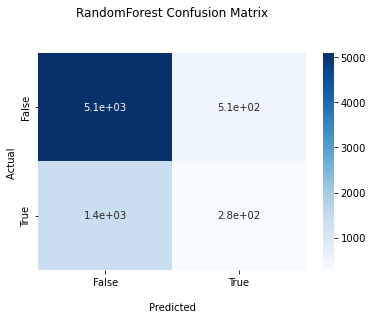

In [62]:
conf_m = sns.heatmap(confusao, annot=True, cmap='Blues')
conf_m.set_title('RandomForest Confusion Matrix\n\n');
conf_m.set_xlabel('\nPredicted')
conf_m.set_ylabel('Actual ');
conf_m.xaxis.set_ticklabels(['False','True'])
conf_m.yaxis.set_ticklabels(['False','True'])
plt.show()